# Project: Investigate a Dataset - Analysis of Gapminder World Data.
## Analyzing How CO2 Emissions Impact Human Life and Life Span 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This project will be analyzing data from [Gapminder](https://www.gapminder.org/data/) regarding CO2 emissions and how this relates to environmental data and human life. To do this we will look specifically at the datasets from Environmental Disasters: 'Homeless from Natural Disasters' and 'Number of Disasters Deaths' as well as 'Life Expectancy' and 'Income per Person'. Each data set has data by country and year, with collected data as well as projected data ranging from 1799-2080 depending on the dataset. To analyze the relationships of the different tables we will compare global totals and averages for each year where years can be compared. The datasets for 'Income per Person' and 'Life Expectancy' have averages per person for each country and year while the other datasets include total counts for each country and year so we will be using averages and sums respectively.



### Question(s) for Analysis
> How do CO2 emissions relate to changes in human life?
> - How do CO2 emissions correlate with the effects of Natural Disasters such as homelessness and deaths?
> - How do CO2 emissions correlate with human life expectancy?
> - How do CO2 emissions correlate with income per person?

In [249]:
# Importing packages that will be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [129]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

^C


<a id='wrangling'></a>
## Data Wrangling


### General Properties
> This data includes many separate data sets, each with information for multiple countries. Since this analysis is more focused on global trends with CO2 each data frame had a row with total values added for each year and then dropped the individual country data. This data was also shown to have multiple years with null values during this process which will need to be cleaned as well as some formatting issues with a few of the datasets.

In [250]:
# Loading data into dataframes
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_hmls = pd.read_csv('hmless_nd.csv')
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_le = pd.read_csv('life_expectancy_years.csv')
df_nd_deaths = pd.read_csv('ndisasd_tot.csv')

> This is where we do a quick investigation into each data frame to see details on data such as datatypes and null values as well as looking at what the data looks like. The first set of code is where we check for datatypes and potential formatting and incorrect datatype issues. Note that some data frames have more object types than expected.

In [251]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 220 entries, country to 2017
dtypes: float64(215), object(5)
memory usage: 333.6+ KB


In [252]:
df_hmls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Columns: 122 entries, country to 2019
dtypes: float64(36), object(86)
memory usage: 179.3+ KB


In [253]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2049
dtypes: int64(101), object(151)
memory usage: 384.0+ KB


In [254]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2099
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [255]:
df_nd_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Columns: 124 entries, country to 2021
dtypes: float64(58), object(66)
memory usage: 184.2+ KB


>This was a quick check for any duplicate rows.

In [256]:
df_co2.duplicated().sum()

0

In [257]:
df_hmls.duplicated().sum()

0

In [258]:
df_income.duplicated().sum()

0

In [259]:
df_le.duplicated().sum()

0

In [260]:
df_nd_deaths.duplicated().sum()

0

> Next, we are going to drop the column with the country names since we will be looking at global trends and won’t need to know this information.

In [261]:
# Dropping 'country' column from each dataframe to remove all the country names.
def drop_df_column():
    all_df = [df_co2, df_hmls, df_income, df_le, df_nd_deaths]
    for df in all_df:
        df.drop(columns=['country'], inplace = True)
drop_df_column()   

> This is where we do a quick check to see how many null values are potentially in the dataframes. After looking at this data I decided to later clean the data and remove most of the null values including any rows that had all null values and fill most of the null values with a default 0 but decided to leave the null values in the dataframes that included averages to prevent skewing this data.

In [262]:
df_co2.isnull().sum()

1799    189
1800    189
1801    187
1802    189
1803    188
       ... 
2013      0
2014      0
2015      0
2016      0
2017      0
Length: 219, dtype: int64

In [263]:
df_hmls.isnull().sum()

1899    182
1900    181
1901    176
1902    172
1903    169
       ... 
2015     18
2016     20
2017     29
2018     43
2019     69
Length: 121, dtype: int64

In [264]:
df_income.isnull().sum()

1799    0
1800    0
1801    0
1802    0
1803    0
       ..
2045    0
2046    0
2047    0
2048    0
2049    0
Length: 251, dtype: int64

In [265]:
df_le.isnull().sum()

1799    9
1800    9
1801    9
1802    9
1803    9
       ..
2095    9
2096    9
2097    9
2098    9
2099    9
Length: 301, dtype: int64

In [266]:
df_nd_deaths.isnull().sum()

1899    184
1900    182
1901    177
1902    171
1903    168
       ... 
2017     18
2018     28
2019     37
2020     52
2021    168
Length: 123, dtype: int64

> Here we are doing a quick check to confirm potential format issues and making sure the data for each file makes sense.

In [267]:
df_co2.head()

1799  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...    2008  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   0.238   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.230   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.470   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   6.120   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  20.900   

    2009    2010    2011   2012    2013    2014    2015    2016    2017  
0   0.29   0.406   0.345   0.28   0.253   0.262   0.245   0.247   0.254  
1   1.24   1.250   1.350   1.28   1.640   1.220   1.180   1.140   1.120  
2   1.56   1.790   1.690   1.69   1.900   1.600   1.570   1.610   1.590  
3   6.12   5.870   5.920   5.90   5.830   5.970   6.070   6.270   6.120  
4  18.30  18.900  23.800  23.70  24.200  20.700  21.700  21.100  21.400  

[5 rows x 219 columns]

In [268]:
df_le.head()

1799  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  2090  \
0  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  28.1  ...  75.5   
1  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...  78.8   
2  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...  87.4   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  ...  82.4   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  
0  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  82.5  82.6  82.7  82.8  82.9  83.0  83.1  83.2  83.3  

[5 rows x 301 columns]

> The first files have several years with many or all null values but otherwise, look relatively clean.

In [269]:
df_hmls.head()

1899  1900  1901  1902  1903 1904 1905  1906  1907  1908  ...  2010  2011  \
0   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  ...  9700  2680   
1   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  ...   100     0   
2   NaN   NaN   NaN   NaN   NaN    0    0   0.0   0.0   0.0  ...     0     0   
3   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  ...   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  ...     0  2000   

  2012  2013   2014  2015  2016  2017  2018  2019  
0    0   10k  45.1k     0  1650     0  7780  8530  
1    0     0   2000  5160  3750     0  4540     0  
2    0     0      0     0     0     0     0   NaN  
3  NaN   NaN    NaN   NaN     0   NaN   NaN   NaN  
4    0     0      0     0     0     0     0     0  

[5 rows x 121 columns]

In [270]:
df_income.head()

1799  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...   2040  \
0   683   683   683   683   683   683   683   683   683   683  ...   2690   
1   700   702   705   709   711   714   718   721   725   727  ...   8000   
2   755   755   755   755   755   756   756   756   756   756  ...  25.1k   
3  1360  1360  1360  1360  1370  1370  1370  1370  1380  1380  ...  68.9k   
4  1130  1130  1140  1140  1150  1150  1160  1160  1160  1170  ...   101k   

    2041   2042   2043   2044   2045   2046   2047   2048   2049  
0   2750   2810   2870   2930   2990   3060   3120   3190   3260  
1   8170   8350   8530   8710   8900   9090   9280   9480   9690  
2  25.6k  26.2k  26.7k  27.3k  27.9k  28.5k  29.1k  29.7k  30.4k  
3  70.4k  71.9k  73.4k    75k  76.6k  78.3k    80k  81.7k  83.4k  
4   103k   105k   107k   110k   112k   114k   117k   119k   122k  

[5 rows x 251 columns]

>The data from df_income and df_hmls show formatting issues where numbers have a 'k' and 'M' next to several values and are not actually int datatypes, this is corrected in the data cleaning section below. It is also assumed based on datatype info from above that the df_nd_deaths dataframe has this formatting issue as well.

In [271]:
df_nd_deaths.head()

1899 1900  1901  1902  1903 1904 1905 1906 1907 1908  ...   2012   2013  \
0  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  ...  228.0  575.0   
1  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  ...   25.0   26.0   
2  NaN  NaN   NaN   NaN   NaN  120    0    0    0    0  ...    0.0    0.0   
3  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  ...   22.0   15.0   
4  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  ...   92.0   56.0   

    2014   2015   2016   2017   2018   2019   2020  2021  
0  481.0  192.0  241.0  189.0  211.0  328.0  396.0  28.0  
1  459.0  113.0   11.0   27.0   71.0   33.0   22.0   NaN  
2    1.0    2.0    7.0    0.0   51.0    0.0    0.0   NaN  
3   10.0    0.0    0.0    NaN    NaN    NaN    NaN   NaN  
4   72.0    0.0   77.0    2.0   14.0    3.0   15.0   NaN  

[5 rows x 123 columns]


### Data Cleaning
> Here is where we remove unnecessary columns by dropping columns with all null values since these years had no data collected. I chose not to delete all null values since the analysis will be of totals and means for each year and I wanted any year with data from any file to be included. We will instead replace the null values in dataframes that will be used for global sums with 0 and leave the average values with nulls so this data is not skewed.

In [272]:
# Dropping columns that have all null values from each dataframe
df_hmls.dropna(axis=1, how='all', inplace=True)
df_income.dropna(axis=1, how='all', inplace=True)
df_le.dropna(axis=1, how='all', inplace=True)
df_nd_deaths.dropna(axis=1, how='all', inplace=True)

In [273]:
# Filling null values for dataframes to help fix formatting issues and require sums
df_hmls.fillna(0, inplace=True)
df_nd_deaths.fillna(0, inplace=True)

>I noticed a few of the files had a couple issues. There are null values and the data had a lot of object/string values compared to some of the other files, in these files there were numbers with 'k' next to them and further investigation showed 'M' next to some values as well and were not using datatype float or int. Some of these issues have been cleaned or changed for further fixes.

In [274]:
# Search for substrings and replace with arithmetic for calculations in each dataframe with suspected formatting issues
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
df_hmls.replace(repl_dict, regex=True, inplace=True)
df_income.replace(repl_dict, regex=True, inplace=True)
df_nd_deaths.replace(repl_dict, regex=True, inplace=True)

In [275]:
# This calculates any cell value with arithmatic and converst all values to int 
df_hmls = df_hmls.applymap(pd.eval).astype(int)
df_income = df_income.applymap(pd.eval).astype(int)
df_nd_deaths = df_nd_deaths.applymap(pd.eval).astype(int)

> To analyze the global trends for each of these data frames we will create a new dataframe with the global mean of each year for life_expectancy_years and income_per_person_gdppercapita_ppp_inflation_adjusted due to the data being an average per person from each country and would not make sense as a sum value. For the other three data frames, these include the total counts for each country by year so we will create new dataframes with the sum of each year to get the total per year values.

In [276]:
# Create new data frames with sum/mean values from correlated dataframe
df_co2.loc['global_co2_emissions']= df_co2.sum(numeric_only=True, axis=0)
df_hmls.loc['global_homeless_from_natural_disasters']= df_hmls.sum(numeric_only=True, axis=0)
df_income.loc['global_mean_income']= df_income.mean(numeric_only=True, axis=0)
df_le.loc['global_mean_life_expectency']= df_le.mean(numeric_only=True, axis=0)
df_nd_deaths.loc['global_natural_disasters_deaths']= df_nd_deaths.sum(numeric_only=True, axis=0)


> Now that the sum and global mean values have been created we can drop the individual country information by row.

In [277]:
df_co2.drop(df_co2.index[:194], inplace=True)
df_hmls.drop(df_hmls.index[:188], inplace=True)
df_income.drop(df_income.index[:195], inplace=True)
df_le.drop(df_le.index[:195], inplace=True)
df_nd_deaths.drop(df_nd_deaths.index[:190], inplace=True)

> Next, we can confirm each dataframe now had a sum or global average of each year of data and double-check that everything looks like it should.

In [278]:
df_co2.tail()

1799     1800     1801     1802     1803     1804  \
global_co2_emissions  2.61893  2.58916  4.61938  2.85211  2.93425  2.95289   

                         1805     1806     1807     1808  ...      2008  \
global_co2_emissions  3.05873  3.15828  2.99873  2.96658  ...  896.9038   

                          2009      2010      2011      2012      2013  \
global_co2_emissions  916.6691  905.6275  916.1699  899.8984  892.1219   

                          2014      2015      2016      2017  
global_co2_emissions  872.3802  866.5037  871.2452  872.8278  

[1 rows x 219 columns]

In [279]:
df_hmls.tail()

1899  1900  1901  1902  1903   1904  \
global_homeless_from_natural_disasters     0    24     0     0  2180  20100   

                                          1905  1906  1907  1908  ...  \
global_homeless_from_natural_disasters  110300     0     0  3296  ...   

                                           2010    2011    2012     2013  \
global_homeless_from_natural_disasters  1935316  951840  329496  1364913   

                                          2014     2015    2016    2017  \
global_homeless_from_natural_disasters  622691  2454012  379779  417181   

                                          2018   2019  
global_homeless_from_natural_disasters  389250  63511  

[1 rows x 121 columns]

In [280]:
df_income.tail()

1799         1800         1801         1802  \
global_mean_income  1072.179487  1071.353846  1074.210256  1073.753846   

                           1803         1804         1805         1806  \
global_mean_income  1075.430769  1075.174359  1076.169231  1076.251282   

                           1807         1808  ...          2040          2041  \
global_mean_income  1066.497436  1067.553846  ...  31265.887179  31926.969231   

                            2042          2043          2044          2045  \
global_mean_income  32628.666667  33321.482051  34038.717949  34775.692308   

                            2046     2047          2048          2049  
global_mean_income  35524.302564  36288.2  37069.538462  37862.666667  

[1 rows x 251 columns]

In [281]:
df_le.tail()

1799       1800       1801       1802  \
global_mean_life_expectency  31.503763  31.463441  31.480108  31.385484   

                                  1803       1804       1805       1806  \
global_mean_life_expectency  31.460753  31.586559  31.644086  31.598387   

                                  1807       1808  ...       2090       2091  \
global_mean_life_expectency  31.385484  31.313441  ...  83.361828  83.476344   

                                  2092       2093       2094       2095  \
global_mean_life_expectency  83.600538  83.717742  83.838172  83.955376   

                                  2096       2097       2098       2099  
global_mean_life_expectency  84.076344  84.193548  84.312903  84.430645  

[1 rows x 301 columns]

In [282]:
df_nd_deaths.tail()

1899    1900   1901  1902  1903   1904  \
global_natural_disasters_deaths  1267800  200036  13996  7822  1267  21003   

                                  1905     1906   1907     1908  ...   2012  \
global_natural_disasters_deaths  36000  1313275  75883  1506585  ...  28844   

                                  2013   2014   2015   2016   2017   2018  \
global_natural_disasters_deaths  27394  34927  17113  16424  19800  27207   

                                  2019   2020  2021  
global_natural_disasters_deaths  17646  18286   401  

[1 rows x 123 columns]

> Next, I used the concat function to merge the cleaned data frames into a single dataframe to allow for easier analysis. Then did some quick checks on the new dataframe.

In [283]:
# Combining all dataframes into one
frames = [df_co2, df_hmls, df_income, df_le, df_nd_deaths]
df_global = pd.concat(frames)

In [284]:
# Swapping columns and rows for clarity and resetting index to add column named 'years'
df_global = df_global.transpose().reset_index()
df_global.rename(columns = {'index':'years'}, inplace=True)
df_global.head()

years  global_co2_emissions  global_homeless_from_natural_disasters  \
0  1799               2.61893                                     NaN   
1  1800               2.58916                                     NaN   
2  1801               4.61938                                     NaN   
3  1802               2.85211                                     NaN   
4  1803               2.93425                                     NaN   

   global_mean_income  global_mean_life_expectency  \
0         1072.179487                    31.503763   
1         1071.353846                    31.463441   
2         1074.210256                    31.480108   
3         1073.753846                    31.385484   
4         1075.430769                    31.460753   

   global_natural_disasters_deaths  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN

In [285]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   years                                   301 non-null    object 
 1   global_co2_emissions                    215 non-null    float64
 2   global_homeless_from_natural_disasters  121 non-null    float64
 3   global_mean_income                      251 non-null    float64
 4   global_mean_life_expectency             301 non-null    float64
 5   global_natural_disasters_deaths         123 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.2+ KB


> Now that we have a dataframe with the global sums and averages we can remove any remaining null values before our final analysis. Since there are some columns still missing data and can't be compared we will need to remove any rows with all null values and insert a value of 0 for the remaining null values, as well as drop most of the projected data since this data is mostly of recorded data rather than projections.

In [286]:
# Drop any rows with all null values
df_global.dropna(axis=1, how='all', inplace=True)

# Drop all rows after year 2017 due to missing and unneccessary data
df_global.drop(df_global.index[219:], inplace=True)

# Fill null values with a default of 0 for a baseline due to limited historical data
df_global.fillna(0, inplace=True)

df_global.tail(20)

years  global_co2_emissions  global_homeless_from_natural_disasters  \
199  1998              858.1837                               6561330.0   
200  1999              884.7042                               1765437.0   
201  2000              896.2413                               3111316.0   
202  2001              893.5487                                346640.0   
203  2002              918.0034                               2902962.0   
204  2003              925.7277                               2573561.0   
205  2004              930.2609                               6261058.0   
206  2005              942.6907                               6156450.0   
207  2006              947.5709                               1170175.0   
208  2007              943.7152                               3241753.0   
209  2008              896.9038                                510254.0   
210  2009              916.6691                               2417740.0   
211  2010              905.6275                               1935316.0   
212  2011              916.1699                                951840.0   
213  2012              899.8984                                329496.0   
214  2013              892.1219                               1364913.0   
215  2014              872.3802                                622691.0   
216  2015              866.5037                               2454012.0   
217  2016              871.2452                                379779.0   
218  2017              872.8278                                417181.0   

     global_mean_income  global_mean_life_expectency  \
199        14671.548718                    67.169231   
200        15201.589744                    67.489231   
201        15417.035897                    67.770769   
202        15657.702564                    67.963077   
203        16057.133333                    68.207692   
204        16717.938462                    68.470769   
205        17216.707692                    68.818462   
206        17955.364103                    69.181538   
207        18619.846154                    69.542564   
208        18747.517949                    69.856410   
209        17986.200000                    70.205128   
210        18297.461538                    70.445128   
211        18598.748718                    70.893333   
212        18755.010256                    71.186154   
213        18957.800000                    71.470256   
214        19220.189744                    71.642564   
215        19516.400000                    71.876923   
216        19778.866667                    72.133846   
217        20114.594872                    72.394359   
218        20473.256410                    72.632821   

     global_natural_disasters_deaths  
199                          85483.0  
200                          27941.0  
201                          48028.0  
202                          34120.0  
203                         123938.0  
204                         255068.0  
205                         106156.0  
206                          38756.0  
207                          30079.0  
208                         248788.0  
209                          22813.0  
210                         336967.0  
211                          40794.0  
212                          17710.0  
213                          28844.0  
214                          27394.0  
215                          34927.0  
216                          17113.0  
217                          16424.0  
218                          19800.0

In [287]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   years                                   219 non-null    object 
 1   global_co2_emissions                    219 non-null    float64
 2   global_homeless_from_natural_disasters  219 non-null    float64
 3   global_mean_income                      219 non-null    float64
 4   global_mean_life_expectency             219 non-null    float64
 5   global_natural_disasters_deaths         219 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.4+ KB


In [288]:
df_global.describe()

global_co2_emissions  global_homeless_from_natural_disasters  \
count            219.000000                            2.190000e+02   
mean             285.201917                            7.994063e+05   
std              354.762201                            2.507938e+06   
min                0.000000                            0.000000e+00   
25%               14.262565                            0.000000e+00   
50%              101.835670                            0.000000e+00   
75%              590.016520                            2.764315e+05   
max              989.181300                            2.935578e+07   

       global_mean_income  global_mean_life_expectency  \
count          219.000000                   219.000000   
mean          5073.626367                    43.532095   
std           5500.866739                    14.505369   
min           1065.748718                    23.521398   
25%           1338.776923                    31.753495   
50%           2221.338462                    35.198387   
75%           7205.443590                    58.329487   
max          20473.256410                    72.632821   

       global_natural_disasters_deaths  
count                     2.190000e+02  
mean                      1.345937e+05  
std                       4.781340e+05  
min                       0.000000e+00  
25%                       0.000000e+00  
50%                       5.622000e+03  
75%                       3.377650e+04  
max                       3.719493e+06

<a id='eda'></a>
## Exploratory Data Analysis


### What effects do CO2 emissions have on impacts from Natural Disasters such as homelessness and deaths?
> To begin the analysis we first need to make a column with the decades of each year for grouping data by decade. This will allow for cleaner visuals and easier to spot any long-term trends.

In [289]:
#Creating column with decades for potential grouping
df_global['decade'] = (10 * (df_global['years'].astype(int) // 10)).astype(str) + 's'

df_global.head()

years  global_co2_emissions  global_homeless_from_natural_disasters  \
0  1799               2.61893                                     0.0   
1  1800               2.58916                                     0.0   
2  1801               4.61938                                     0.0   
3  1802               2.85211                                     0.0   
4  1803               2.93425                                     0.0   

   global_mean_income  global_mean_life_expectency  \
0         1072.179487                    31.503763   
1         1071.353846                    31.463441   
2         1074.210256                    31.480108   
3         1073.753846                    31.385484   
4         1075.430769                    31.460753   

   global_natural_disasters_deaths decade  
0                              0.0  1790s  
1                              0.0  1800s  
2                              0.0  1800s  
3                              0.0  1800s  
4                              0.0  1800s

> Now we can take a quick look to see what the trends for C02 data look like by decade.

In [290]:
df_global['global_co2_emissions'].groupby(df_global['decade']).mean()

decade
1790s      2.618930
1800s      3.106845
1810s      2.750042
1820s      2.506504
1830s      3.880911
1840s      8.591815
1850s     14.246220
1860s     22.115063
1870s     33.275360
1880s     48.971826
1890s     67.238126
1900s     96.958299
1910s    111.472649
1920s    123.745172
1930s    177.778189
1940s    281.352978
1950s    332.688038
1960s    631.721454
1970s    937.466696
1980s    842.473010
1990s    872.510255
2000s    921.133170
2010s    887.096825
Name: global_co2_emissions, dtype: float64

In [291]:
df_global['global_homeless_from_natural_disasters'].groupby(df_global['decade']).mean()

decade
1790s          0.0
1800s          0.0
1810s          0.0
1820s          0.0
1830s          0.0
1840s          0.0
1850s          0.0
1860s          0.0
1870s          0.0
1880s          0.0
1890s          0.0
1900s      13590.0
1910s      17147.9
1920s      31513.7
1930s     416480.0
1940s      59997.0
1950s     107775.4
1960s     948038.2
1970s    2458456.3
1980s    2175831.6
1990s    7563455.2
2000s    2869190.9
2010s    1056903.5
Name: global_homeless_from_natural_disasters, dtype: float64

In [292]:
df_global['global_natural_disasters_deaths'].groupby(df_global['decade']).mean()

decade
1790s         0.00
1800s         0.00
1810s         0.00
1820s         0.00
1830s         0.00
1840s         0.00
1850s         0.00
1860s         0.00
1870s         0.00
1880s         0.00
1890s    126780.00
1900s    332496.30
1910s    390246.20
1920s    417103.60
1930s    464708.70
1940s    374747.50
1950s    216848.40
1960s    210256.40
1970s     65274.80
1980s     85470.50
1990s    118897.70
2000s    124471.30
2010s     25375.75
Name: global_natural_disasters_deaths, dtype: float64

> Based on this first look at the data there is definitely a general increase in CO2 emissions although from the 1970s on there is less of a trend. Next, we will create some graphs to compare this info with our data on homelessness and deaths caused by natural disasters.

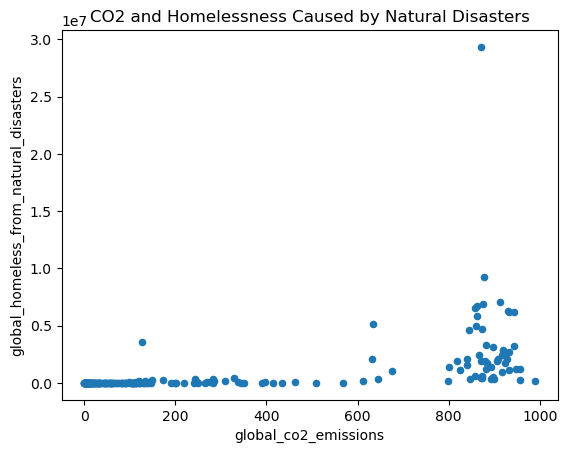

In [293]:
df_global.plot(x="global_co2_emissions", y="global_homeless_from_natural_disasters", kind="scatter", title='CO2 and Homelessness Caused by Natural Disasters');

> There does seem to be a potential trend with increasing CO2 emissions and global homelessness caused by natural disasters based on this initial graph.

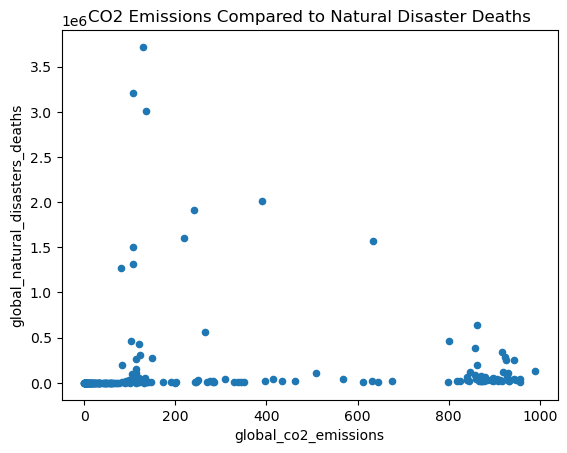

In [294]:
df_global.plot(x="global_co2_emissions", y="global_natural_disasters_deaths", kind="scatter", title= 'CO2 Emissions Compared to Natural Disaster Deaths');

> For deaths caused by natural disasters though there are either quite a few outliers or a potential decrease however there is also some clustering at both high and low ends of CO2 emissions which might be caused by data collection or change in life span since the higher CO2 emissions are from more recent years.

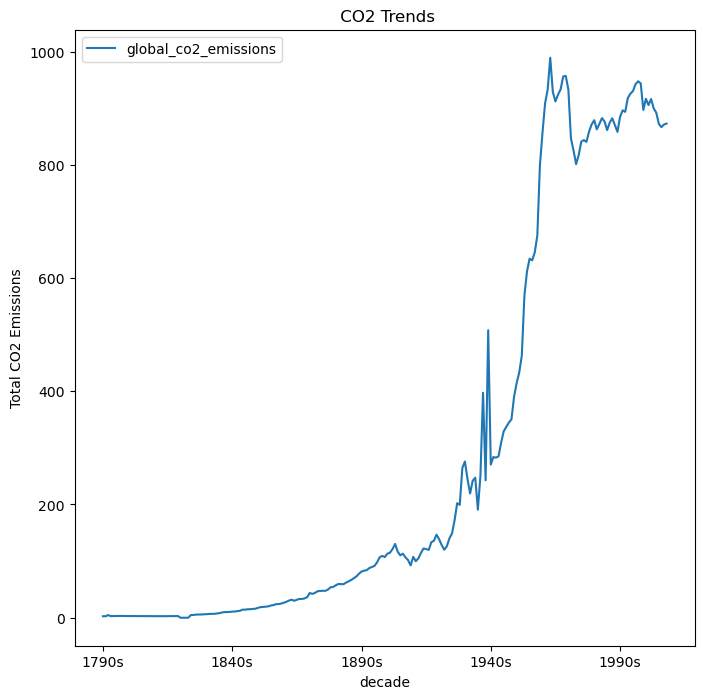

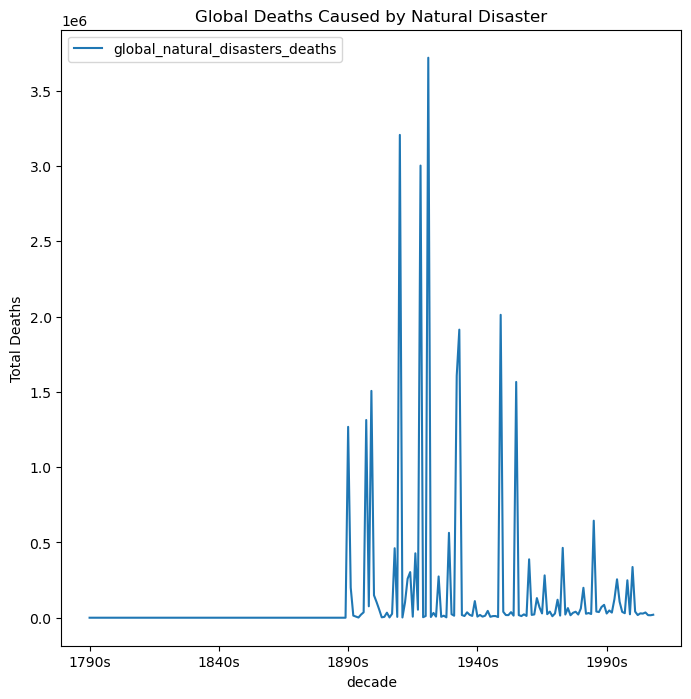

In [295]:
# create line graph comparing global co2, homeless, and deaths from natural disasters
df_global.plot(x="decade", y=["global_co2_emissions"], title=' CO2 Trends',
        kind="line", figsize=(8, 8))
plt.ylabel('Total CO2 Emissions')
df_global.plot(x="decade", y=["global_natural_disasters_deaths"], title='Global Deaths Caused by Natural Disaster',
        kind="line", figsize=(8, 8))
plt.ylabel('Total Deaths')

# display plot
plt.show()

> After comparing these two line graphs separately it appears deaths by natural disasters have been declining overtime while CO2 emissions have been increasing so it is difficult to say if this is connected or not due to outside factors related to lifespan.

### How do CO2 emissions impact human life expectancy?
> Next, we create a line graph to compare global CO2 emissions and life expectancy to see how both of these increase. This next line graph shows a slight increase in average life expectancy however it doesn't have a strong correlation with CO2 emissions.

In [296]:
df_global['global_mean_life_expectency'].groupby(df_global['decade']).mean()

decade
1790s    31.503763
1800s    31.486022
1810s    31.578925
1820s    31.680269
1830s    31.645860
1840s    31.702204
1850s    31.770699
1860s    31.625866
1870s    32.178984
1880s    33.020269
1890s    33.828731
1900s    34.925844
1910s    34.570027
1920s    38.243065
1930s    41.564538
1940s    45.773983
1950s    54.905487
1960s    58.924821
1970s    62.292205
1980s    65.242974
1990s    66.772564
2000s    69.046154
2010s    71.778782
Name: global_mean_life_expectency, dtype: float64

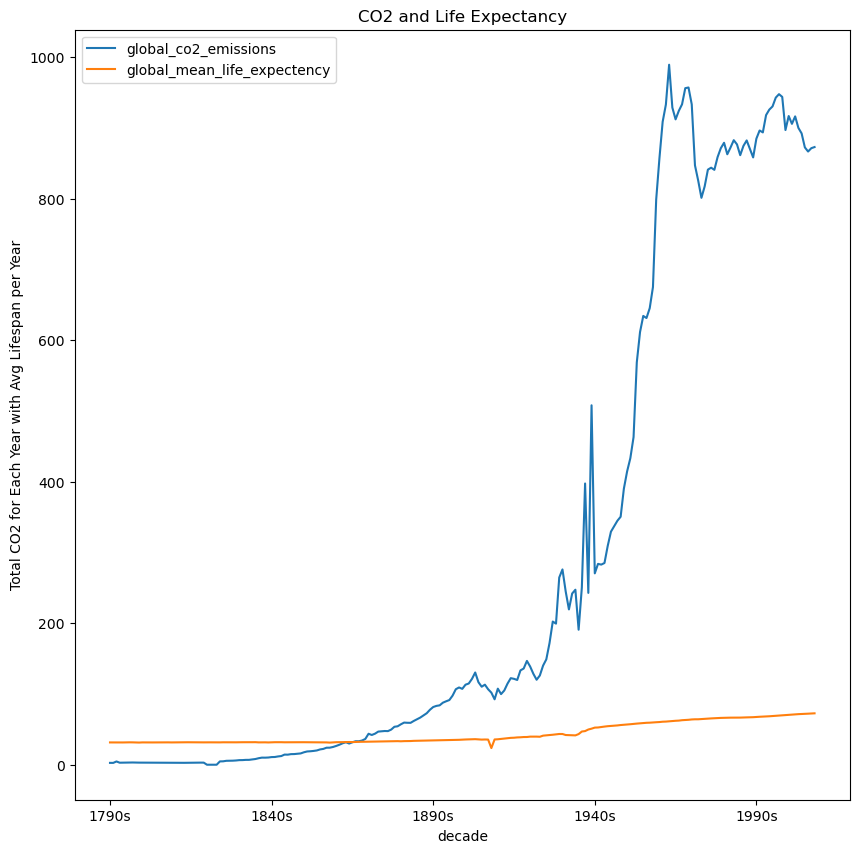

In [297]:
# create line graph comparing global co2, and mean life expectancy
df_global.plot(x="decade", y=["global_co2_emissions", "global_mean_life_expectency"], title= 'CO2 and Life Expectancy',
        kind="line", figsize=(10, 10))
plt.ylabel('Total CO2 for Each Year with Avg Lifespan per Year') 
# display plot
plt.show()

> With this graph we can see there is deffinitely a large increase in CO2 levels over time and that there is a slight increase in average liife expectancy. Due to the large difference in values though it is difficult to see any trends between the two.

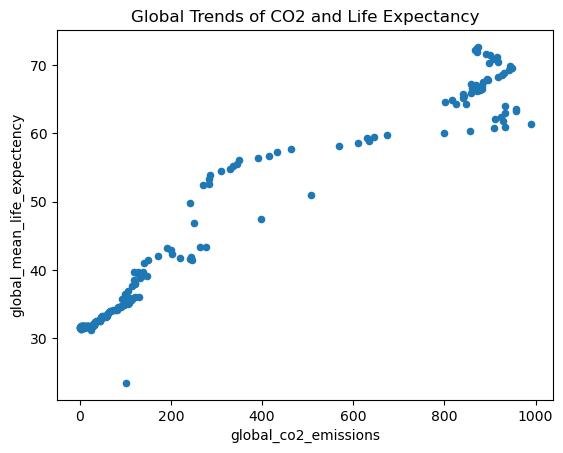

In [298]:
df_global.plot(x="global_co2_emissions", y="global_mean_life_expectency", kind="scatter", title= 'Global Trends of CO2 and Life Expectancy');

> This scatterplot shows a potential relationship with life expectency and CO2 emissions as both are increasing together.

### How do CO2 emissions correlate with income per person?

In [299]:
df_global['global_mean_income'].groupby(df_global['decade']).mean()

decade
1790s     1072.179487
1800s     1072.497949
1810s     1072.084615
1820s     1113.643590
1830s     1182.310256
1840s     1247.145128
1850s     1349.930769
1860s     1447.189744
1870s     1583.486667
1880s     1732.485128
1890s     1898.314872
1900s     2129.761026
1910s     2306.424103
1920s     2670.021538
1930s     3056.037949
1940s     3711.057949
1950s     5223.273846
1960s     8124.245128
1970s    11540.325128
1980s    12151.681538
1990s    13584.505128
2000s    17267.290769
2010s    19426.858333
Name: global_mean_income, dtype: float64

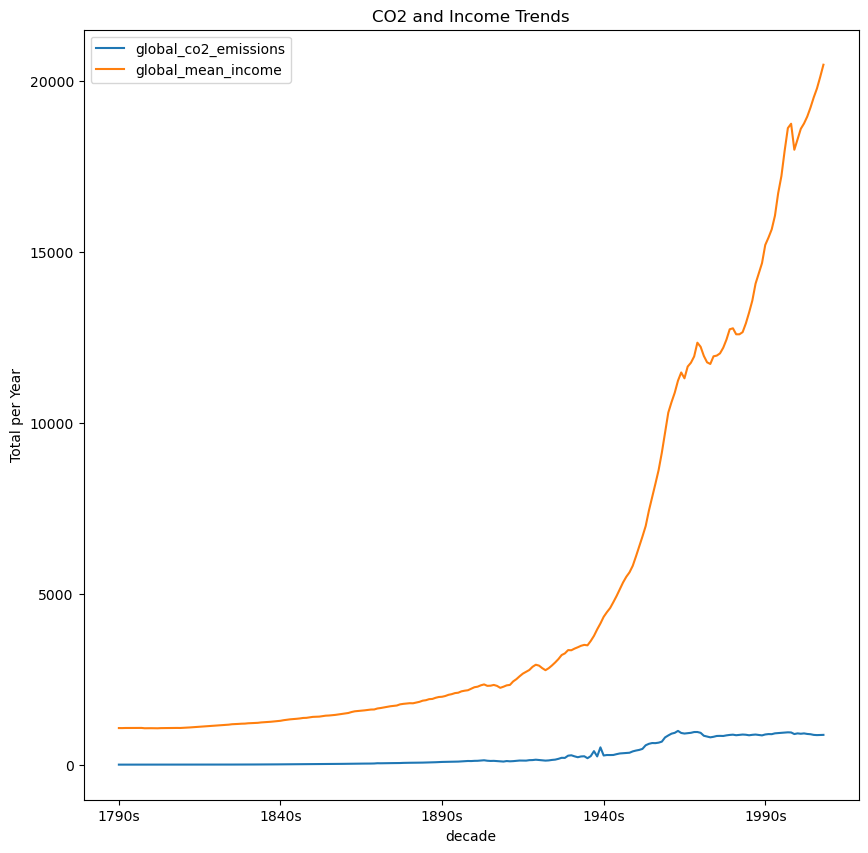

In [300]:
# create line graph comparing global co2, global mean income
df_global.plot(x="decade", y=["global_co2_emissions", "global_mean_income"], title= 'CO2 and Income Trends',
        kind="line", figsize=(10, 10))
plt.ylabel('Total per Year')
# display plot
plt.show()

> Based on this line graph and the mean data per decade above confirming an increase in income over time, there might be some correlation between CO2 emissions and income since both are increasing around similar timeframes but it was not very clear.

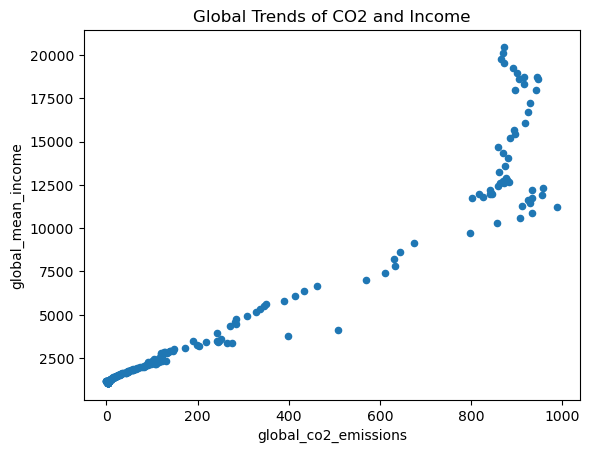

In [301]:
df_global.plot(x="global_co2_emissions", y="global_mean_income", kind="scatter", title= 'Global Trends of CO2 and Income');

> After comparing as a scatter plot there definitely seems to be a potential correlation between income and CO2 emissions however with this limited data it would not be possible to tell which variable is effecting which or if both are just increasing simultaneously. Now lets look at a statistical comparison of each variable to see if there is any more insight we can gather.

### Global Averages per Decade Comparison
> Due to each set of data having different values based on each variable it is difficult to compare them directly so I wanted to look at global average trends for each decade to see if there is any possible relationships in changes overtime.

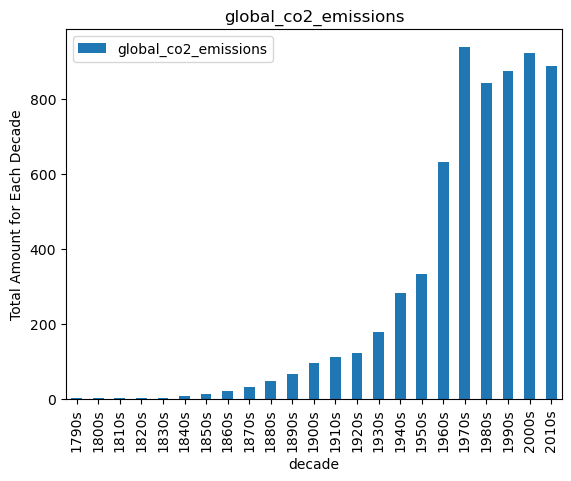

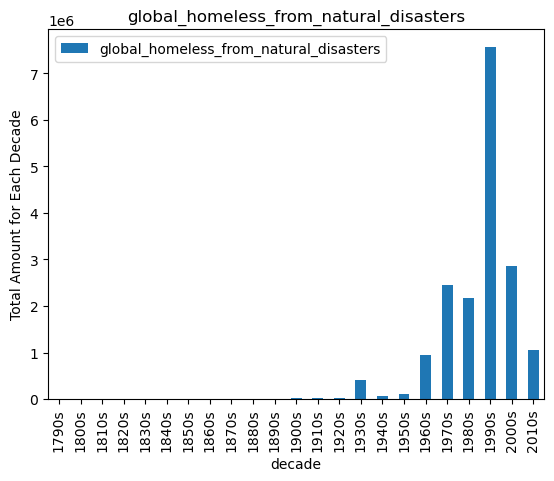

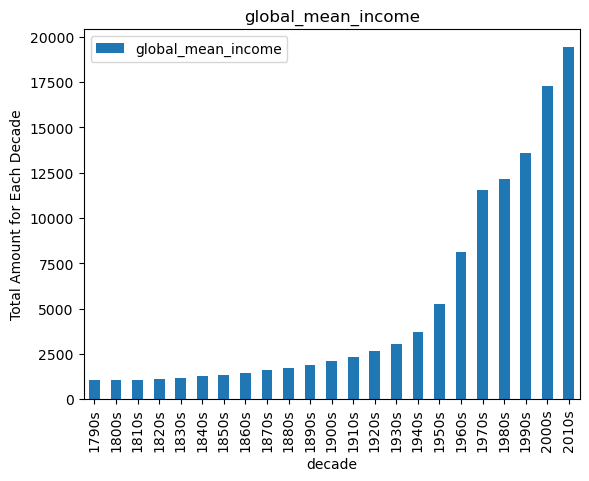

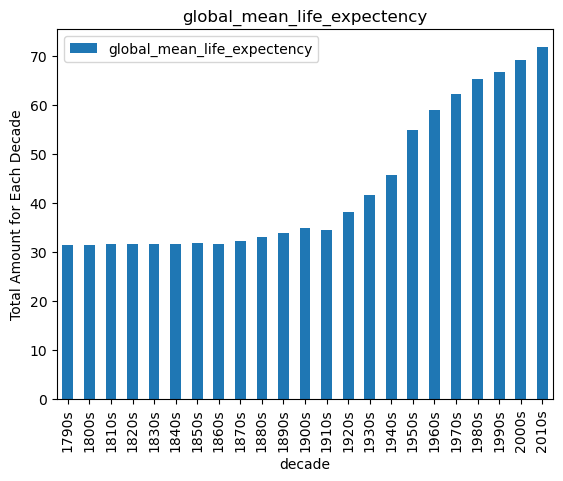

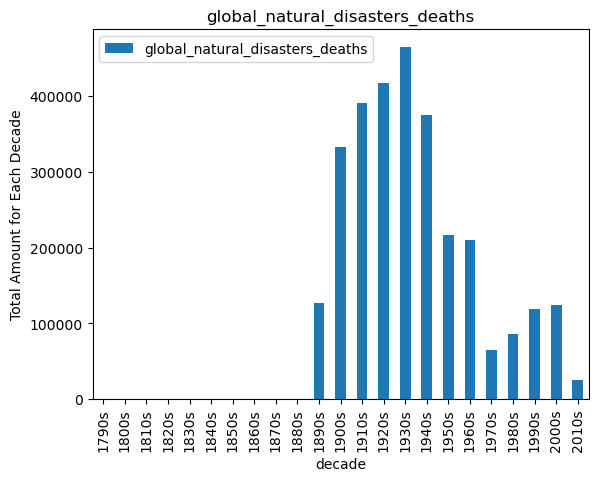

In [302]:
# Selecting specific columns to iterate through
df_global_columns = df_global.iloc[:, 1:6]

# Create boxplot for each selected column   
for column in df_global_columns:
    df_global[[column]].groupby(df_global['decade']).mean().plot(kind='bar', title=column)
    plt.ylabel('Total Amount for Each Decade')


> After looking at these bar charts with averages per decade it is possible there is still an increase in deaths from natural disasters starting in th 1970's and there is likely missing data for the 2010's. This also verified the trend in increasing CO2 emissions along with increasing income and life expectency.

> These bar graphs also shows that there is not any obvious increase in natural disaster caused homelessness per decade and no visible correlation between CO2 emissions and homelessness.


<a id='conclusions'></a>
## Conclusions

> Based on this analysis there are some potential connections between increasing CO2 and its impact on human life. It is clear that global homeless from natural disasters is increasing as CO2 emissions increase as well as average income and human life expectancy. Initially global natural disaster deaths appeared to either not correlate or was potentially decreasing as CO2 rises but after further investigation by looking at averages per decade there does appear to be an increase in both natural disaster deaths and CO2 emissions after the 1970's. The only variable that did not appear to be increasing with 

> Although it is not possible to see if there is an actual relationship with most of this data it is interesting to see how CO2 emissions compare to this data. There could be more investigation done with each of these variables to see if there are other outside factors affecting changes over time as well as what other things could be related to CO2 emissions.


### Limitation
> The data used in this analysis is limited by historical records as well as a lack of additional information that could further elaborate these findings. Most of the files had many null values due to different records collected by each individual country and all the data relies heavily on the acuracy of those records.


In [504]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1